<a href="https://colab.research.google.com/github/Simarjit1303/Data-Science/blob/main/data_preprocessing_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with data preprocessing and feature engineering steps. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - handling the implicit missing values of attributes, e.g., removing them using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - transforming features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), which requires encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset if needed using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes if needed using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [ ]:
# prompt: Load the adult dataset using Pandas.

import pandas as pd
from sklearn import model_selection, compose, preprocessing, svm, metrics
# import sklearn.model_selection
# import sklearn.compose
# import sklearn.preprocessing
# import sklearn.svm
# import sklearn.metrics

# Data Collection

In [ ]:
# Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv")
# Display first 5 rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# train_test_split() uses 25% for test an 75% for training
df_train, df_test = model_selection.train_test_split(df)
print("df_size", df.shape)
print("df_train_size", df_train.shape)
print("df_test_size", df_test.shape)

df_size (32561, 15)
df_train_size (24420, 15)
df_test_size (8141, 15)


# Data Exploration

In [ ]:
# We explore the trained data as we cannot access the test data
df_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

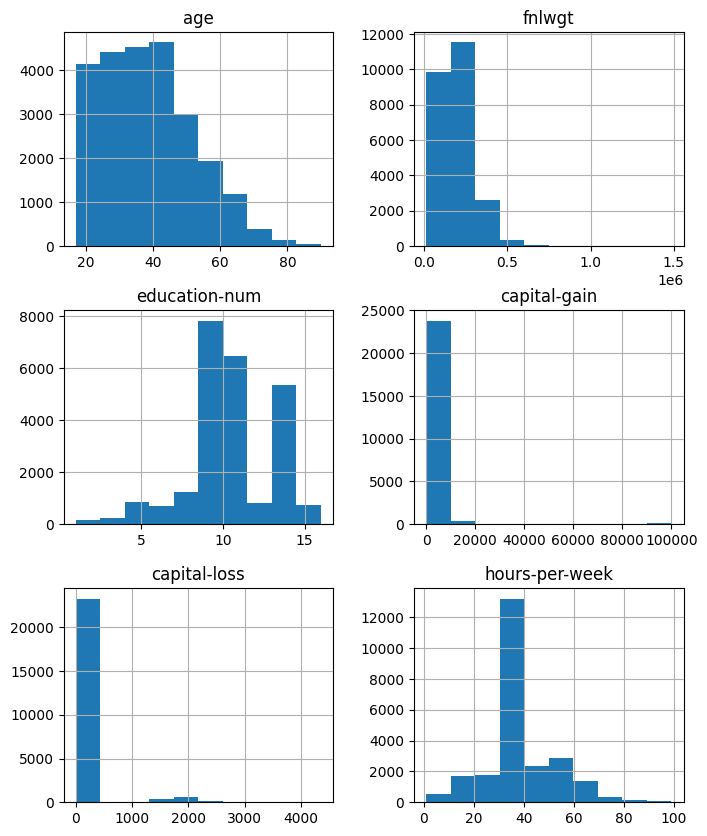

In [ ]:
# Using graph to visualize the trained data
df_train.hist(figsize=(8, 10))

<Axes: xlabel='workclass'>

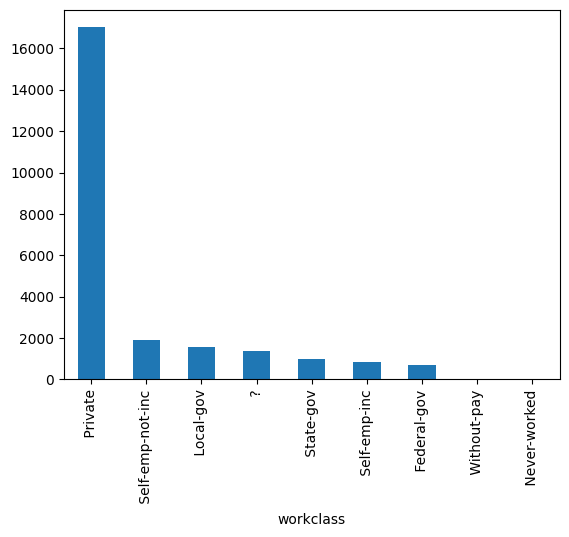

In [ ]:
# Gives lists of values and frequency
df_train["workclass"].value_counts().plot(kind="bar")
# Here it contains an implicit missing values

In [ ]:
# Here it shows the leading space [unique] values within it.
df_train["workclass"].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' ?',
       ' Self-emp-inc', ' State-gov', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

<Axes: xlabel='target'>

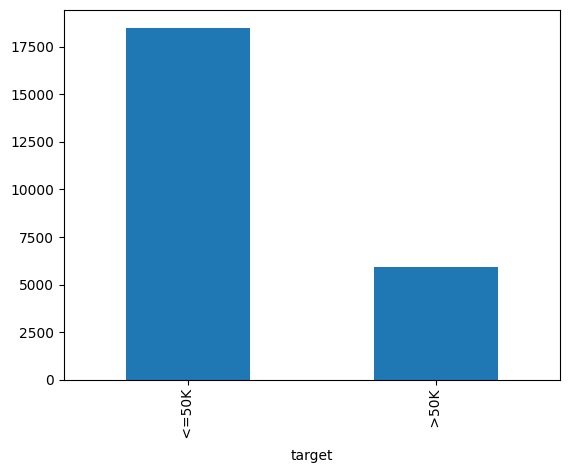

In [ ]:
# Here we check the target value as balanced or imbalaced data
# Result is the data is imbalanced.
df_train["target"].value_counts().plot(kind="bar")

# Data Reprocessing

In [ ]:
# replacing a value from training dataset using the below code
# here 'pd' is the pandas and 'NaT' represents the null value
df_train = df_train.replace(" ?", pd.NaT)

# replacing a value from test dataset using the below code
# here 'pd' is the pandas and 'NaT' represents the null value
df_test = df_test.replace(" ?", pd.NaT)

# using the below code to remove explicit code from the dataset
df_train = df_train.dropna()
df_test = df_test.dropna()

# printing the outcome to check the values in dataframe
print("x_train_size", df_train.shape)
print("x_test_size", df_test.shape)


x_train.size (22634, 15)
x_test.size (7528, 15)


In [ ]:
# drop methods by default removes the row but here we want to remove the column
# "target" so that's why we have mentioned the axis value to 1 for dropping the column
x_train = df_train.drop("target", axis=1)
y_train = df_train["target"] #we need to separate the features from the target labels
x_test = df_test.drop("target",axis=1)
y_test = df_test["target"]

print("x_train size:",x_train.shape)
print("y_train size:",y_train.shape)
print("x_test size:",x_test.shape)
print("y_test size:",y_test.shape)